Load packages

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.pipeline import Pipeline


# no max column limit
pd.set_option('display.max_columns', None)

Import data

In [38]:
# load duck data
duck_df = pd.read_excel('/Users/micaholivas/Desktop/Personal/Programming Projects/quack-u-weather/Data/Duck_daily.xlsx')

# load weather data
weather_df = pd.read_csv('/Users/micaholivas/Desktop/Personal/Programming Projects/quack-u-weather/Data/3486317.csv')

Format and merge dfs

In [39]:
## Weather Data
# convert date to datetime
weather_df['DATE'] = pd.to_datetime(weather_df['DATE'])

# get rid of unnecessary columns
drop_cols = ['STATION',	'NAME',	'LATITUDE',	'LONGITUDE', 'ELEVATION',]
for col in drop_cols:
    if col in weather_df.columns:
        weather_df.drop(col, axis=1, inplace=True)

# sort by date
weather_df.sort_values(by='DATE', inplace=True)

# remove completely empty columns
weather_df.dropna(axis=1, how='all', inplace=True)

weather_df

,DATE,DAPR,DAPR_ATTRIBUTES,MDPR,MDPR_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,TOBS,TOBS_ATTRIBUTES,WT01,WT01_ATTRIBUTES,WT03,WT03_ATTRIBUTES,WT05,WT05_ATTRIBUTES,WT06,WT06_ATTRIBUTES,WT11,WT11_ATTRIBUTES
2906,2000-01-01,NaN,NaN,NaN,NaN,0.0,"P,,0,0800",0.0,"P,,0",0.0,"P,,0",60.0,",,0",31.0,",,0",57.0,",,0,1600",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2907,2000-01-02,NaN,NaN,NaN,NaN,0.0,"P,,0,0800",0.0,"P,,0",0.0,"P,,0",57.0,",,0",37.0,",,0",55.0,",,0,1600",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2908,2000-01-03,NaN,NaN,NaN,NaN,0.0,"P,,0,0800",0.0,"P,,0",0.0,"P,,0",56.0,",,0",27.0,",,0",56.0,",,0,1600",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2909,2000-01-04,NaN,NaN,NaN,NaN,0.0,"P,,0,0800",0.0,"P,,0",0.0,"P,,0",60.0,",,0",26.0,",,0",60.0,",,0,1600",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2910,2000-01-05,NaN,NaN,NaN,NaN,0.0,"P,,0,0800",0.0,"P,,0",0.0,"P,,0",60.0,",,0",27.0,",,0",53.0,",,0,1600",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10547,2023-10-02,NaN,NaN,NaN,NaN,0.0,",,H,0800",NaN,NaN,NaN,NaN,76.0,",,H",53.0,",,H",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2904,2023-10-03,NaN,NaN,NaN,NaN,0.0,",,N",0.0,",,N",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10548,2023-10-03,NaN,NaN,NaN,NaN,0.0,",,H,0800",NaN,NaN,NaN,NaN,70.0,",,H",54.0,",,H",55.0,",,H,0800",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2905,2023-10-04,NaN,NaN,NaN,NaN,0.0,",,N",0.0,",,N",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
## Duck Data
# convert date to datetime
duck_df['DATE'] = pd.to_datetime(duck_df['Date'])

# change dpg nan to 0
duck_df['dpg'].fillna(0, inplace=True)

duck_df

,Date,num_ducks,num_guns,dpg,Month,Day,Year,DATE
0,2011-10-08,69,14,4.928571,10,8,2011,2011-10-08
1,2011-10-09,29,11,2.636364,10,9,2011,2011-10-09
2,2011-10-12,24,6,4.000000,10,12,2011,2011-10-12
3,2011-10-15,14,4,3.500000,10,15,2011,2011-10-15
4,2011-10-16,0,0,0.000000,10,16,2011,2011-10-16
...,...,...,...,...,...,...,...,...
434,2020-01-26,36,14,2.571429,1,26,2020,2020-01-26
435,2020-01-29,137,24,5.708333,1,29,2020,2020-01-29
436,2020-01-31,22,20,1.100000,1,31,2020,2020-01-31
437,2020-02-08,35,13,2.692308,2,8,2020,2020-02-08


In [41]:
# merge dataframes on date
merged_df = pd.merge(weather_df, duck_df, on='DATE', how='outer')

# remove rows with no duck data
merged_df.dropna(subset=['dpg'], inplace=True)

# # remove 'ATTRIBUTE' columns
# for col in merged_df.columns:
#     if 'ATTRIBUTE' in col:
#         merged_df.drop(col, axis=1, inplace=True)

merged_df


,DATE,DAPR,DAPR_ATTRIBUTES,MDPR,MDPR_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,TOBS,TOBS_ATTRIBUTES,WT01,WT01_ATTRIBUTES,WT03,WT03_ATTRIBUTES,WT05,WT05_ATTRIBUTES,WT06,WT06_ATTRIBUTES,WT11,WT11_ATTRIBUTES,Date,num_ducks,num_guns,dpg,Month,Day,Year
3989,2011-10-08,NaN,NaN,NaN,NaN,0.0,",,7,0800",NaN,NaN,NaN,NaN,69.0,",,7",52.0,",,7",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-10-08,69.0,14.0,4.928571,10.0,8.0,2011.0
3990,2011-10-09,NaN,NaN,NaN,NaN,0.0,",,7,0800",NaN,NaN,NaN,NaN,74.0,",,7",47.0,",,7",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-10-09,29.0,11.0,2.636364,10.0,9.0,2011.0
3993,2011-10-12,NaN,NaN,NaN,NaN,0.0,",,7,0800",NaN,NaN,NaN,NaN,85.0,",,7",58.0,",,7",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-10-12,24.0,6.0,4.000000,10.0,12.0,2011.0
3996,2011-10-15,NaN,NaN,NaN,NaN,0.0,",,7,0800",NaN,NaN,NaN,NaN,92.0,",,7",60.0,",,7",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-10-15,14.0,4.0,3.500000,10.0,15.0,2011.0
3997,2011-10-16,NaN,NaN,NaN,NaN,0.0,",,7,0800",NaN,NaN,NaN,NaN,93.0,",,7",60.0,",,7",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-10-16,0.0,0.0,0.000000,10.0,16.0,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10568,2019-11-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-10,3.0,1.0,3.000000,11.0,10.0,2019.0
10569,2019-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-16,2.0,7.0,0.285714,11.0,16.0,2019.0
10570,2019-12-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-21,12.0,17.0,0.705882,12.0,21.0,2019.0
10571,2019-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-25,21.0,6.0,3.500000,12.0,25.0,2019.0


In [42]:
## OPTIONAL: One Hot Encode ATTRIBUTE columns
# one hot encode ATTRIBUTE columns
all_attribute_cols = []
for col in merged_df.columns:
    if 'ATTRIBUTE' in col:
        all_attribute_cols.append(col)

# create one hot encoded dictionary for each attribute
one_hot_df = {}
for col in all_attribute_cols:
    one_hot_df[col] = {}
    cardinality = len(merged_df[col].unique())
    vals = merged_df[col].unique()
    for i, val in enumerate(vals):
        one_hot_df[col][val] = range(cardinality)[i]

# replace ATTRIBUTE columns with one hot encoded columns
for col in all_attribute_cols:
    merged_df[col] = merged_df[col].map(one_hot_df[col])
merged_df

,DATE,DAPR,DAPR_ATTRIBUTES,MDPR,MDPR_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,TOBS,TOBS_ATTRIBUTES,WT01,WT01_ATTRIBUTES,WT03,WT03_ATTRIBUTES,WT05,WT05_ATTRIBUTES,WT06,WT06_ATTRIBUTES,WT11,WT11_ATTRIBUTES,Date,num_ducks,num_guns,dpg,Month,Day,Year
3989,2011-10-08,NaN,0,NaN,0,0.0,0,NaN,0,NaN,0,69.0,0,52.0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,2011-10-08,69.0,14.0,4.928571,10.0,8.0,2011.0
3990,2011-10-09,NaN,0,NaN,0,0.0,0,NaN,0,NaN,0,74.0,0,47.0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,2011-10-09,29.0,11.0,2.636364,10.0,9.0,2011.0
3993,2011-10-12,NaN,0,NaN,0,0.0,0,NaN,0,NaN,0,85.0,0,58.0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,2011-10-12,24.0,6.0,4.000000,10.0,12.0,2011.0
3996,2011-10-15,NaN,0,NaN,0,0.0,0,NaN,0,NaN,0,92.0,0,60.0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,2011-10-15,14.0,4.0,3.500000,10.0,15.0,2011.0
3997,2011-10-16,NaN,0,NaN,0,0.0,0,NaN,0,NaN,0,93.0,0,60.0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,2011-10-16,0.0,0.0,0.000000,10.0,16.0,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10568,2019-11-10,NaN,0,NaN,0,NaN,4,NaN,0,NaN,0,NaN,1,NaN,1,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,2019-11-10,3.0,1.0,3.000000,11.0,10.0,2019.0
10569,2019-11-16,NaN,0,NaN,0,NaN,4,NaN,0,NaN,0,NaN,1,NaN,1,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,2019-11-16,2.0,7.0,0.285714,11.0,16.0,2019.0
10570,2019-12-21,NaN,0,NaN,0,NaN,4,NaN,0,NaN,0,NaN,1,NaN,1,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,2019-12-21,12.0,17.0,0.705882,12.0,21.0,2019.0
10571,2019-12-25,NaN,0,NaN,0,NaN,4,NaN,0,NaN,0,NaN,1,NaN,1,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,2019-12-25,21.0,6.0,3.500000,12.0,25.0,2019.0


In [43]:
# remove num_guns
if 'num_guns' in merged_df.columns:
    merged_df.drop('num_guns', axis=1, inplace=True)
if 'num_ducks' in merged_df.columns:
    merged_df.drop('num_ducks', axis=1, inplace=True)

In [44]:
# Load data into X and y
X = merged_df.drop(['dpg', 'Date', 'DATE'], axis=1)
y = merged_df['dpg']

In [45]:
# drop empty columns
for col in X.columns:
    if X[col].isnull().sum() == len(X[col]):
        X.drop(col, axis=1, inplace=True)

In [46]:
from sklearn.experimental import enable_iterative_imputer  # This line enables the use of IterativeImputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression  # Make sure to import LinearRegression

In [47]:
# Function to create a pipeline with an imputer
def create_imputer_pipeline(imputer):
    return Pipeline([('imputer', imputer)])

# Mean/Median/Mode Imputation
mean_imputer = create_imputer_pipeline(SimpleImputer(strategy='mean'))
median_imputer = create_imputer_pipeline(SimpleImputer(strategy='median'))
mode_imputer = create_imputer_pipeline(SimpleImputer(strategy='most_frequent'))

# K-Nearest Neighbors (KNN) Imputation
knn_imputer = create_imputer_pipeline(KNNImputer(n_neighbors=5))

# Multivariate Imputation by Chained Equations (MICE)
mice_imputer = create_imputer_pipeline(IterativeImputer())

# Custom Imputers
class RandomImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X_filled = X.copy()
        for column in X.columns:
            mask = X[column].isnull()
            if mask.all():  # If all values are missing in this column
                # Option 1: Fill with a constant value
                X_filled.loc[mask, column] = 0  # or some other constant
                # Option 2: Skip this column
                # continue
                # Option 3: Fill with random values from another column (e.g., the first column)
                # X_filled.loc[mask, column] = np.random.choice(X.iloc[:, 0].dropna(), mask.sum(), replace=True)
            else:
                X_filled.loc[mask, column] = np.random.choice(X[column].dropna(), mask.sum(), replace=True)
        return X_filled

random_imputer = create_imputer_pipeline(RandomImputer())


class RegressionImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_filled = X.copy()
        for column in X.columns:
            mask = X_filled[column].isnull()
            regressor = LinearRegression()  # Now LinearRegression is defined
            regressor.fit(X_filled.loc[~mask, X_filled.columns != column], X_filled.loc[~mask, column])
            X_filled


regression_imputer = create_imputer_pipeline(RegressionImputer())

# Hot Deck Imputation (Custom Transformer)
class HotDeckImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X.fillna(method='ffill', inplace=False)

hot_deck_imputer = create_imputer_pipeline(HotDeckImputer())


### Gradient Boosting

In [61]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, make_scorer
import pandas as pd
from tqdm import tqdm

# Define imputers
imputers = {
    'mean_imputer': mean_imputer,
    'median_imputer': median_imputer,
    'mode_imputer': mode_imputer,
    'knn_imputer': knn_imputer,
    'mice_imputer': mice_imputer,
    'random_imputer': random_imputer,
    'hot_deck_imputer': hot_deck_imputer
}

# Define param grid
learning_rate = [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, .3]
max_depth = [1, 2, 3, 4, 5, 6, 7, 8, 9]
n_estimators = [50, 100, 200, 500, 1000, 1500, 2000]

# Grid Search setup
best_score = float('inf')
best_params = None

# Create tqdm total
total = len(imputers)

for name, imputer in tqdm(imputers.items(), total=total):
    pipeline = Pipeline([
        ('imputer', imputer),
        ('regressor', xgb.XGBRegressor(objective='reg:squarederror'))
    ])
    if name in ['mean_imputer', 'median_imputer', 'mode_imputer']:
        param_grid = {
            'imputer__imputer__strategy': ['mean', 'median', 'most_frequent'],
            'regressor__learning_rate': learning_rate,
            'regressor__max_depth': max_depth,
            'regressor__n_estimators': n_estimators
        }
    else:
        param_grid = {
            'regressor__learning_rate': learning_rate,
            'regressor__max_depth': max_depth,
            'regressor__n_estimators': n_estimators
        }

    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=make_scorer(mean_squared_error, greater_is_better=False), n_jobs=-1, verbose=1)
    
    try:
        grid_search.fit(X, y)
    except Exception as e:
        print(f"Error during grid search with {name}: {e}")
        continue  # Skip to the next iteration
    if -grid_search.best_score_ < best_score:
        print(f'New Best Score: {-grid_search.best_score_}')
        print(f'New Best Params: {grid_search.best_params_}')
        best_score = -grid_search.best_score_
        best_params = (name, grid_search.best_params_)

# Output the best results
print(f'Best Imputer: {best_params[0]}')
print(f'Best Params: {best_params[1]}')
print(f'Best Score: {best_score}')

  0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 1323 candidates, totalling 6615 fits


  0%|          | 0/7 [00:00<?, ?it/s]


KeyboardInterrupt: 

In [64]:
# print best params
best_params

None


In [72]:
# use best imputer and params for final model
pipeline = Pipeline([
    ('imputer', imputers['mice_imputer']),
    ('regressor', xgb.XGBRegressor(objective='reg:squarederror'))
])

pipeline.set_params(**{
    'regressor__learning_rate': 0.2,
    'regressor__max_depth': 4,
    'regressor__n_estimators': 200
})

Pipeline(steps=[('imputer', Pipeline(steps=[('imputer', IterativeImputer())])),
                ('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.2,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=4, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=200, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [73]:
# perform imputation
X_imputed = pipeline['imputer'].fit_transform(X)

In [74]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2)

Text(0.5, 1.0, 'Actual vs. Predicted\nXGBoost\nDucks per Gun per Day\nMSE: 1.9875342653662178')

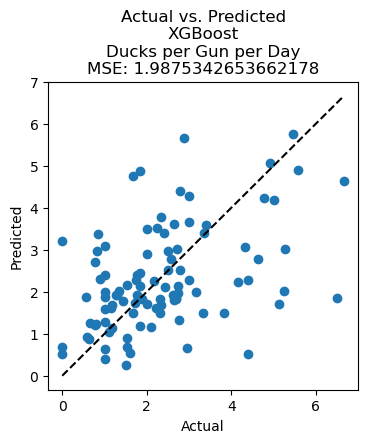

In [78]:
import xgboost as xgb

# clear display
from IPython.display import clear_output

# Use the preprocessed data from the previous snippet
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Initialize parameters
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror')

# repeat 100 times, then plot the lowest MSE
mse = []
preds = []
actuals = []
for i in range(10):
    print(i)
    # Train and evaluate model
    X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.15)
    xgb_regressor.fit(X_train, y_train)
    predictions = xgb_regressor.predict(X_test)

    # append mse
    mse.append(mean_squared_error(y_test, predictions))

    # append preds and actuals
    preds.append(predictions)
    actuals.append(y_test)

    # clear display
    clear_output(wait=True)

# plot lowest mse
min_MSE = np.argmin(mse)
plt.figure(figsize=(4, 4))
plt.scatter(actuals[min_MSE], preds[min_MSE])
plt.plot([min(actuals[min_MSE]), max(actuals[min_MSE])], [min(actuals[min_MSE]), max(actuals[min_MSE])], 'k--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted\nXGBoost\nDucks per Gun per Day\nMSE: ' + str(mse[min_MSE]))

In [79]:
# store predictions and actuals
preds = preds[min_MSE]
actuals = actuals[min_MSE]

In [80]:
# Simplify predictions: convert to 1-5 scale, from worst to best
# get average dpg
avg_dpg = merged_df['dpg'].mean()

# create scale
scale_increments = 5
scale = []
for i in range(scale_increments):
    scale.append(avg_dpg + (i * avg_dpg))

print(scale)

[2.2975301751818553, 4.595060350363711, 6.892590525545566, 9.190120700727421, 11.487650875909276]


In [81]:
# create function to convert dpg to scale
def dpg_to_scale(dpg):
    for i in range(len(scale)):
        if dpg < scale[i]:
            return i + 1
    return scale_increments

# convert predictions to scale
preds_scale = []
for val in preds:
    preds_scale.append(dpg_to_scale(val))

# convert y_test to scale
actuals_scale = []
for val in actuals:
    actuals_scale.append(dpg_to_scale(val))

In [82]:
# create dataframe of scale values and predictions
preds_df = pd.DataFrame({
    'scale': actuals_scale,
    'preds': preds_scale
})

preds_df

,scale,preds
0,3,3
1,1,2
2,2,2
3,2,1
4,2,1
...,...,...
93,3,3
94,1,1
95,3,2
96,1,1


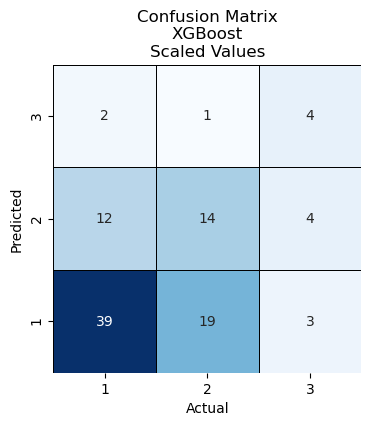

In [83]:
# reset plot settings
sns.reset_orig()
plt.rcParams.update(plt.rcParamsDefault)

# set plot size
plt.figure(figsize=(4, 4))

# create confusion matrix, using cmaps for diagonal and off-diagonal
sns.heatmap(pd.crosstab(preds_df['preds'], preds_df['scale']), annot=True, cmap='Blues', fmt='g', cbar=False, square=True, linewidths=0.5, linecolor='black')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix\nXGBoost\nScaled Values')

# invert y axis
plt.gca().invert_yaxis()

## Save model

In [36]:
# save model for later use
import pickle
pickle.dump(xgb_regressor, open('/Users/micaholivas/Desktop/Personal/Programming Projects/quack-u-weather/Models/xgb_regressor.pkl', 'wb'))